In [14]:
import os
import json
import pandas as pd
import numpy as np

In [10]:
# df = pd.DataFrame(dtype='string', columns=['category', ' package ', ' min_sdk ', ' targ_sdk ', ' #Services '])
# print(df.size)

0


In [15]:
df = pd.read_pickle("AppProperties.pkl")

In [25]:
CATEGORY = {
  'ANDROID_WEAR': 'ANDROID_WEAR',
  'ART_AND_DESIGN': 'ART_AND_DESIGN',
  'AUTO_AND_VEHICLES': 'AUTO_AND_VEHICLES',
  'BEAUTY': 'BEAUTY',
  'BOOKS_AND_REFERENCE': 'BOOKS_AND_REFERENCE',
  'BUSINESS': 'BUSINESS',
  'COMICS': 'COMICS',
  'COMMUNICATION': 'COMMUNICATION',
  'DATING': 'DATING',
  'EDUCATION': 'EDUCATION',
  'ENTERTAINMENT': 'ENTERTAINMENT',
  'EVENTS': 'EVENHEALTH_AND_FITNESSTS',
  'FINANCE': 'FINANCE',
  'FOOD_AND_DRINK': 'FOOD_AND_DRINK',
  'HEALTH_AND_FITNESS': 'HEALTH_AND_FITNESS',
  'HOUSE_AND_HOME': 'HOUSE_AND_HOME',
  'LIBRARIES_AND_DEMO': 'LIBRARIES_AND_DEMO',
  'LIFESTYLE': 'LIFESTYLE',
  'MAPS_AND_NAVIGATION': 'MAPS_AND_NAVIGATION',
  'MEDICAL': 'MEDICAL',
  'MUSIC_AND_AUDIO': 'MUSIC_AND_AUDIO',
  'NEWS_AND_MAGAZINES': 'NEWS_AND_MAGAZINES',
  'PARENTING': 'PARENTING',
  'PERSONALIZATION': 'PERSONALIZATION',
  'PHOTOGRAPHY': 'PHOTOGRAPHY',
  'PRODUCTIVITY': 'PRODUCTIVITY',
  'SHOPPING': 'SHOPPING',
  'SOCIAL': 'SOCIAL',
  'SPORTS': 'SPORTS',
  'TOOLS': 'TOOLS',
  'TRAVEL_AND_LOCAL': 'TRAVEL_AND_LOCAL',
  'VIDEO_PLAYERS': 'VIDEO_PLAYERS',
  'WEATHER': 'WEATHER',
  'GAME': 'GAME',
  'GAME_ACTION': 'GAME_ACTION',
  'GAME_ADVENTURE': 'GAME_ADVENTURE',
  'GAME_ARCADE': 'GAME_ARCADE',
  'GAME_BOARD': 'GAME_BOARD',
  'GAME_CARD': 'GAME_CARD',
  'GAME_CASINO': 'GAME_CASINO',
  'GAME_CASUAL': 'GAME_CASUAL',
  'GAME_EDUCATIONAL': 'GAME_EDUCATIONAL',
  'GAME_MUSIC': 'GAME_MUSIC',
  'GAME_PUZZLE': 'GAME_PUZZLE',
  'GAME_RACING': 'GAME_RACING',
  'GAME_ROLE_PLAYING': 'GAME_ROLE_PLAYING',
  'GAME_SIMULATION': 'GAME_SIMULATION',
  'GAME_SPORTS': 'GAME_SPORTS',
  'GAME_STRATEGY': 'GAME_STRATEGY',
  'GAME_TRIVIA': 'GAME_TRIVIA',
  'GAME_WORD': 'GAME_WORD',
  'FAMILY': 'FAMILY',
  'FAMILY_ACTION': 'FAMILY_ACTION',
  'FAMILY_BRAINGAMES': 'FAMILY_BRAINGAMES',
  'FAMILY_CREATE': 'FAMILY_CREATE',
  'FAMILY_EDUCATION': 'FAMILY_EDUCATION',
  'FAMILY_MUSICVIDEO': 'FAMILY_MUSICVIDEO',
  'FAMILY_PRETEND': 'FAMILY_PRETEND'
}



topics = []
ind = 0

for key in CATEGORY:
    topics.append(key)
    
topics = sorted(topics)

In [31]:
category = "SOCIAL"
DIR = os.path.join("/media/dhruv2601/Carseat/TopFreeAppsDataSet", category)

#get file names
fileNames = os.listdir(DIR)
del fileNames[:]
fileNames = os.listdir(DIR)

nameService = [200]

ind = df.shape[0]

for i in range(0, len(fileNames)):
    if (fileNames[i].split('.')[-1]) == 'apk':
        cmd = "nodejs manifest_extractor_spider.js "+os.path.join(DIR, fileNames[i])
        os.system('nodejs manifest_extractor_spider.js %s'%(os.path.join(DIR, fileNames[i])))

        file0 = json.load(open('output.json'))        

        if((file0!='{ }')):
            print(fileNames[i])

            file1 = file0['manifest']
            file2 = file1[0]
        
            packageName = file2['@package']
        
            file3 = file2['uses-sdk']
            file3 = file3[0]
            if(('@android:targetSdkVersion' in file3) and ('@android:minSdkVersion' in file3)):
                targetSDK = file3['@android:targetSdkVersion']
                minSDK = file3['@android:minSdkVersion']
        
                file4 = file2['application'][0]
                if 'service' not in file4:
                    noOfServices = 0
                else:
                    file5 = file4['service']
                    noOfServices = len(file5)
                    for j in range(0, len(file5)):
                        nameService.extend(file5[j]['@android:name'])
#                 print(nameService[j])
                df.loc[ind+i] = [category, packageName, targetSDK, minSDK, noOfServices]

air.com.MobileApp.GolfNet.CanadaPro.apk
air.com.thetourtracker.cntt.apk
ca.tsn.sports.vr.mobile.apk
co.jttgroup.sport.app.apk
com.allfootball.news.apk
com.andromo.dev516135.app503709.apk
com.antonnikitin.solunarforecast.apk
com.app.cricketmintapp.apk
com.arccosgolf.driver.apk
com.aso.tdf2012int.apk
com.bamnetworks.mobile.android.ballpark.apk
com.bamnetworks.mobile.android.gameday.atbat.apk
com.beinsports.andcontent.apk
com.beyondsoftware.teamstuff.apk
com.bleacherreport.android.teamstream.apk
com.blizzard.owl.apk
com.buzz.RedLight.apk
com.buzzproducts.bluejays.apk
com.juventus.app.android.apk
com.karttuner.racemonitor.apk
com.kicksonfire.android.apk
com.lids.retail.android.apk
com.livescore.apk
com.livesoccertv.apk
com.livesports.mobile.footballivetv.apk
com.mlssoccer.apk
com.myoutdoortv.apk
com.neulion.smartphone.ufc.android.apk
com.nhl.gc1112.free.apk
com.nurun.tva_sports.apk
com.olg.proline.apk
com.oneup.mapleleafs.apk
com.paninidigitalinc.fifatrader.apk
com.pinkbike.trailforks.apk


In [92]:
# !command nodejs manifest_extractor_spider.js /media/dhruv2601/Carseat/TopFreeAppsDataSet/ANDROID_WEAR/com.aa.android.apk

In [32]:
pd.set_option('max_colwidth', 25)
df = df.dropna()

x = df.shape[0]
print(x)
df = df.reset_index(drop=True)

df.to_csv("2Cats.csv", sep='\t', encoding='utf-8')

df

2042


,category,package,min_sdk,targ_sdk,#Services
0,ANDROID_WEAR,ch.publisheria.bring,27,16,18
1,ANDROID_WEAR,com.aa.android,26,21,30
2,ANDROID_WEAR,com.acmeaom.android.m...,26,15,15
3,ANDROID_WEAR,com.adhoclabs.burner,25,16,20
4,ANDROID_WEAR,com.adi.remote.phone,25,16,10
5,ANDROID_WEAR,com.aircanada,24,19,13
6,ANDROID_WEAR,com.amdroidalarmclock...,27,14,49
7,ANDROID_WEAR,com.android2.calculator3,25,14,2
8,ANDROID_WEAR,com.appgeneration.itu...,26,17,24
9,ANDROID_WEAR,com.balysv.loop,27,16,23


In [33]:
df.to_pickle("AppProperties.pkl")
# df = pd.read_pickle(file_name)
# to load and read

In [34]:
target = []
service = []

for i in range(30):
    target.append(0)
    service.append(0)

for i, row in df.iterrows():
    target[row[' min_sdk ']] = target[row[' min_sdk ']]+1
    service[row[' min_sdk ']] = service[row[' min_sdk ']]+row[' #Services ']

print(target[24])
print(service[24])

print(target[25])
print(service[25])
    
print(target[26])
print(service[26])
    
print(target[27])
print(service[27])

123
613
380
2956
533
3797
551
4240


In [ ]:
#no. of targetSDK = 27 are 242
#no. of services for 27(8.1) are 2045 

#no. of targetSDK = 26 are 194
#no. of services for 26(8.0) are 1424

#no. of targetSDK = 25 are 170
#no. of services for 25(7.1) are 1630


#no. of targetSDK = 25 are 67
#no. of services for 25(7.1) are 376

In [35]:
import seaborn as sns
import numpy as np

dfService = pd.DataFrame(dtype='string', columns=[' #Services '])
for i in range(30):
    if(target[i]!=0):
        dfService.loc[i] = [service[i]/target[i]]

dfService = dfService.drop(df.index[28])
dfService
# average no. of services used per SDK level

,#Services
9,0
10,0
11,3
13,0
14,0
15,1
16,4
17,1
18,0
19,5


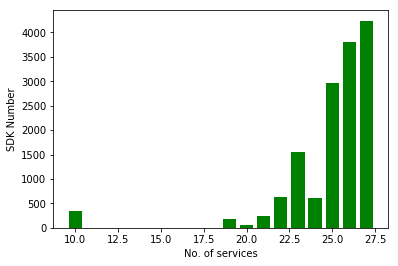

In [38]:
import matplotlib.pyplot as plt

y = service[18:29]
n = len(y)
x = range(n)

for i in range(len(x)-1):
    x[i] = x[i]+18
    
width = 1/1.3
plt.bar(x, y, width, color = "green")
plt.xlabel("No. of services")
plt.ylabel("SDK Number")

fig = plt.gcf()

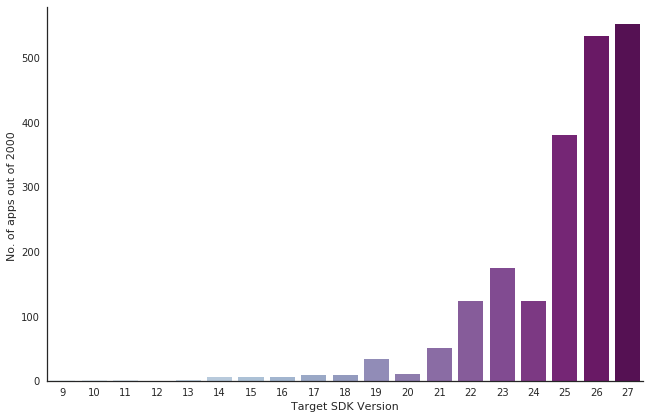

In [42]:
import seaborn as sns
import numpy as np

sns.set(style="white")

sdkLevel = np.arange(9,28)

g = sns.factorplot(x=" min_sdk ", data = df, kind = "count", palette="BuPu", size=6, aspect=1.5, order=sdkLevel)
g.set(xlabel='Target SDK Version', ylabel='No. of apps out of 2000 ')
g.set_xticklabels(step=1)

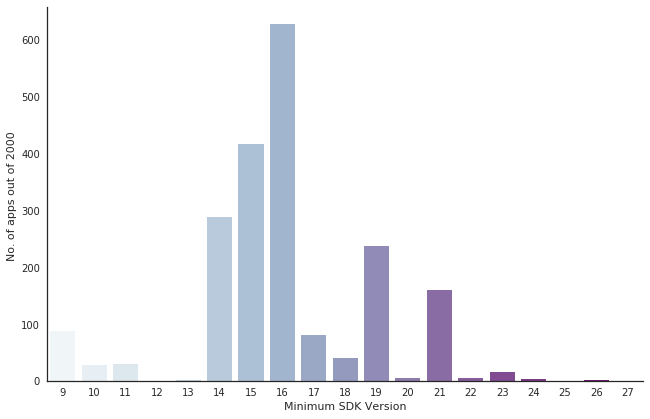

In [41]:
import seaborn as sns
import numpy as np

sns.set(style="white")

sdkLevel = np.arange(9,28)

g = sns.factorplot(x=" targ_sdk ", data = df, kind = "count", palette="BuPu", size=6, aspect=1.5, order=sdkLevel)
g.set(xlabel='Minimum SDK Version', ylabel='No. of apps out of 2000 ')
g.set_xticklabels(step=1)

In [53]:
count = 0
for i, row in df.iterrows():
    pack = row[' package ']
    com = pack.split('.')[0]
    if(com == 'com'):
        count+=1
print(count)

1692


In [43]:
# same minSDK and targetSDK apps
count=0
for i, row in df.iterrows():
    if(row[' min_sdk ']==row[' targ_sdk ']):
        count+=1
        print(str(row[' min_sdk '])+" "+row[' package ']+" "+row['category']+" "+str(row[' #Services ']))
print ("\nNo. of such weird apps: "+str(count))

19 ca.subaru.mysubarucanada AUTO_AND_VEHICLES 1
26 com.binarytoys.speedometer AUTO_AND_VEHICLES 5
14 com.vanitymirror.light BEAUTY 0
14 com.bluefirereader BOOKS_AND_REFERENCE 1
22 com.kronos.mobile.android BUSINESS 3
21 com.asana.app BUSINESS 10
16 com.rsa.securidapp COMMUNICATION 0
21 ca.gwl.group.groupnet FINANCE 0
14 com.paymentevolution.payrollcalculator FINANCE 0
9 com.scottgames.fnaf3demo GAME_ACTION 0
9 com.scottgames.fnaf4demo GAME_ACTION 0
24 com.studiowildcard.wardrumstudios.ark GAME_ADVENTURE 4
16 freedom.bubble GAME_ADVENTURE 8
16 bubbles.pop.power GAME_ARCADE 8
16 com.balloonisland.ultimatejewel GAME_BOARD 0
16 com.mobilityware.freecell GAME_CARD 4
15 com.antiquesnavigator.AntiquesandCollectiblesPriceGuides_3814022 HOUSE_AND_HOME 0
23 tv.peel.app HOUSE_AND_HOME 26
16 com.yellowbrick.raceviewer SPORTS 9

No. of such weird apps: 19
